# Exercise: RDataFrame basics

The file `../data/example_file.root` contains a `TTree` dataset (called `"dataset"`) with two scalar columns `a` and `b`.<br>
There is a normal distribution hidden in there, but to display it you have to plot the natural logarithm of `a` only for entries in which `b <= 0.5`.

### Useful links

- [RDataFrame class reference](https://root.cern/doc/master/classROOT_1_1RDataFrame.html)
- [RDataFrame tutorials](https://root.cern.ch/doc/master/group__tutorial__dataframe.html)

In [3]:
import ROOT as rt

In [10]:
treename = "dataset"
filename = "example_file.root"
df = rt.RDataFrame(treename, filename)
df.Display().Print()

+-----+------------+------------+------------+--------------+
| Row | a          | b          | vec1       | vec2         | 
+-----+------------+------------+------------+--------------+
| 0   | 0.97771140 | 0.99974175 | -3.22012f  | 0.894402f    | 
+-----+------------+------------+------------+--------------+
| 1   | 2.2802012  | 0.48497361 | -1.80835f  | 0.0800873f   | 
|     |            |            | 0.236065f  | 0.479906f    | 
|     |            |            | -3.97713f  | 0.519888f    | 
|     |            |            | -0.293643f | 0.317273f    | 
+-----+------------+------------+------------+--------------+
| 2   | 0.56348245 | 0.39231399 |            |              | 
+-----+------------+------------+------------+--------------+
| 3   | 3.0421559  | 0.33353925 | 0.727539f  | 0.796610f    | 
|     |            |            | -3.81258f  | 0.331128f    | 
|     |            |            | -2.87416f  | -0.00277938f | 
+-----+------------+------------+------------+--------------

In [13]:
df1 = df.Filter("b<=0.5")
df2 = df1.Define("ln_a", "log(a)")
df1.Display().Print()

+-----+------------+------------+------------+--------------+
| Row | a          | b          | vec1       | vec2         | 
+-----+------------+------------+------------+--------------+
| 1   | 2.2802012  | 0.48497361 | -1.80835f  | 0.0800873f   | 
|     |            |            | 0.236065f  | 0.479906f    | 
|     |            |            | -3.97713f  | 0.519888f    | 
|     |            |            | -0.293643f | 0.317273f    | 
+-----+------------+------------+------------+--------------+
| 2   | 0.56348245 | 0.39231399 |            |              | 
+-----+------------+------------+------------+--------------+
| 3   | 3.0421559  | 0.33353925 | 0.727539f  | 0.796610f    | 
|     |            |            | -3.81258f  | 0.331128f    | 
|     |            |            | -2.87416f  | -0.00277938f | 
+-----+------------+------------+------------+--------------+
| 5   | 0.31150198 | 0.20777991 |            |              | 
+-----+------------+------------+------------+--------------

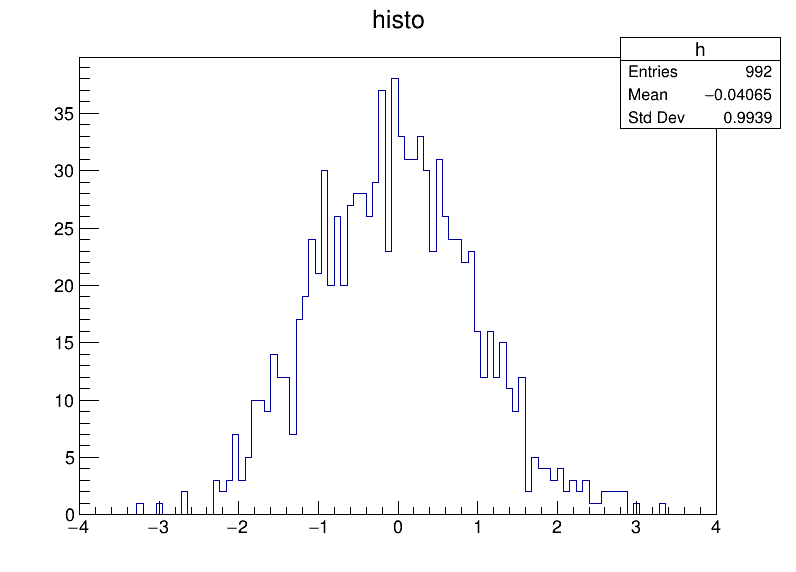

In [14]:
c = rt.TCanvas("c", "canvas", 800, 600)
h = df2.Histo1D(("h", "histo", 100, -4, 4), "ln_a")
h.Draw()
c.Draw()